In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.654690618762475, 1: 2.1161290322580646}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_incident_date',
  'month_policy_bind_date',
  'property_claim',
  'property_damage',
  'umbrella_limit',
  'vehicle_claim'],
 'LDA': ['capital-gains',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_incident_date',
  'month_policy_bind_date',
  'property_claim',
  'property_damage',
  'vehicle_claim'],
 'DTC': ['auto_model',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'month_policy_bind_date',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount',
  'year_policy_bind_date'],
 'RD': ['auto_model',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim',
  'year_policy_bind_date'],
 'KNC': ['age',
  'policy_state',
  'umbrella_limit',
  'insured_sex',
  'incident_severity',
  'i

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 73.636% (4.076%)
Accuracy LDA: 80.486% (3.445%)
Accuracy DTC: 82.021% (4.369%)
Accuracy RD: 79.880% (1.621%)
Accuracy KNC: 76.365% (3.097%)
Accuracy NB: 76.986% (1.633%)
Accuracy SVM: 76.833% (2.399%)
Accuracy NN: 80.485% (2.216%)
Accuracy BG: 78.655% (2.081%)


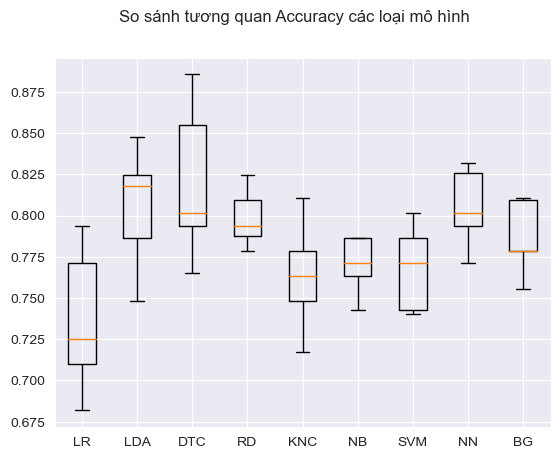

Precision LR: 46.507% (8.845%)
Precision LDA: 64.952% (11.344%)
Precision DTC: 60.632% (12.109%)
Precision RD: 61.306% (9.194%)
Precision KNC: 0.000% (0.000%)
Precision NB: 51.183% (7.196%)
Precision SVM: 50.180% (8.065%)
Precision NN: 60.749% (10.527%)
Precision BG: 56.251% (6.074%)


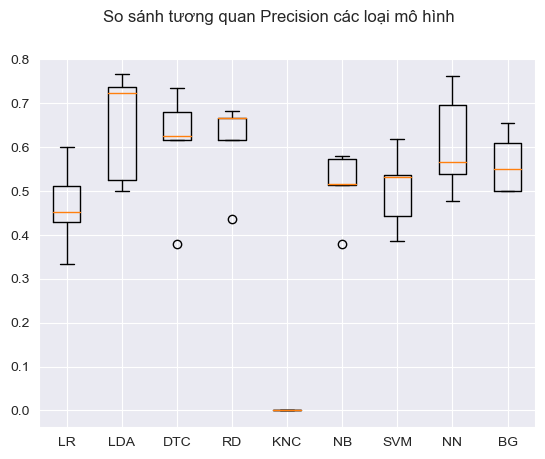

Recall LR: 74.328% (4.504%)
Recall LDA: 40.536% (5.566%)
Recall DTC: 58.259% (13.913%)
Recall RD: 41.823% (3.442%)
Recall KNC: 0.000% (0.000%)
Recall NB: 57.949% (3.749%)
Recall SVM: 71.375% (7.425%)
Recall NN: 45.185% (6.142%)
Recall BG: 37.464% (7.745%)


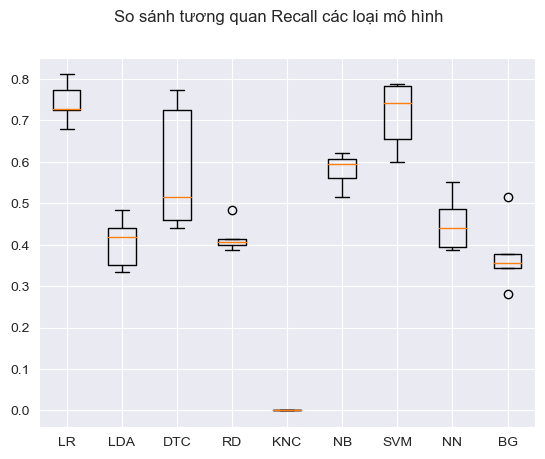

F1 LR: 56.980% (8.069%)
F1 LDA: 49.474% (6.092%)
F1 DTC: 58.238% (13.607%)
F1 RD: 49.359% (4.201%)
F1 KNC: 0.000% (0.000%)
F1 NB: 54.103% (5.174%)
F1 SVM: 58.855% (7.951%)
F1 NN: 53.799% (4.166%)
F1 BG: 44.829% (7.293%)


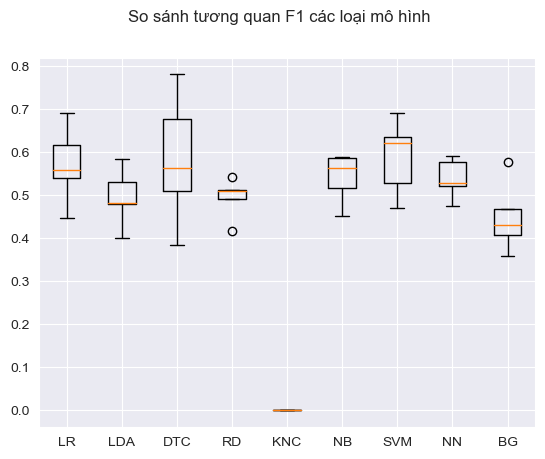

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


### Nhận xét từ kết quả của dữ liệu tập train :

Mô hình DTC (Decision Tree Classifier): Mô hình này có độ chính xác cao nhất (82.021%) so với các mô hình khác. Tuy nhiên, Precision của nó không cao lắm (60.632%), điều này có nghĩa là mô hình này có thể phân loại sai một số hồ sơ không gian lận thành gian lận. Recall của nó khá tốt (58.259%), cho thấy mô hình này ít khi bỏ sót các trường hợp gian lận.

Mô hình LDA (Linear Discriminant Analysis): Mô hình này có độ chính xác thứ hai cao nhất (80.486%) và Precision cao (64.952%). Tuy nhiên, Recall của nó khá thấp (40.536%), cho thấy mô hình này có thể bỏ sót một số trường hợp gian lận.

Mô hình NN (Neural Network): Mô hình này có độ chính xác thứ ba cao nhất (80.485%) và Precision tương đối (60.749%). Tuy nhiên, Recall của nó cũng khá thấp (45.185%).

Dự vào kết quả trên, mô hình DTC là lựa chọn tốt nhất cho bài toán dự đoán hồ sơ gian lận, do có độ chính xác và Recall cao. Tuy nhiên cần cải thiện Precision của mô hình này, vì việc phân loại sai một hồ sơ không gian lận thành gian lận mặc dù không có ảnh hưởng gì quá nghiêm trọng nhưng nếu nhiều có thể gây phiền toái .

## 4 Mô hình đạt điểm cao nhất là:
    -RD: RandomForest
    -DTC: DecisionTreeClassifer
    -BG: Gradient Boosting
    -SVM: Support Vector Machine


In [7]:
evaluate_result={}

### GradientBoostingClassifier

In [16]:
supervied_features=x_train[feature_selection['BG']]
supervied_target=y_train
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(supervied_features,supervied_target)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

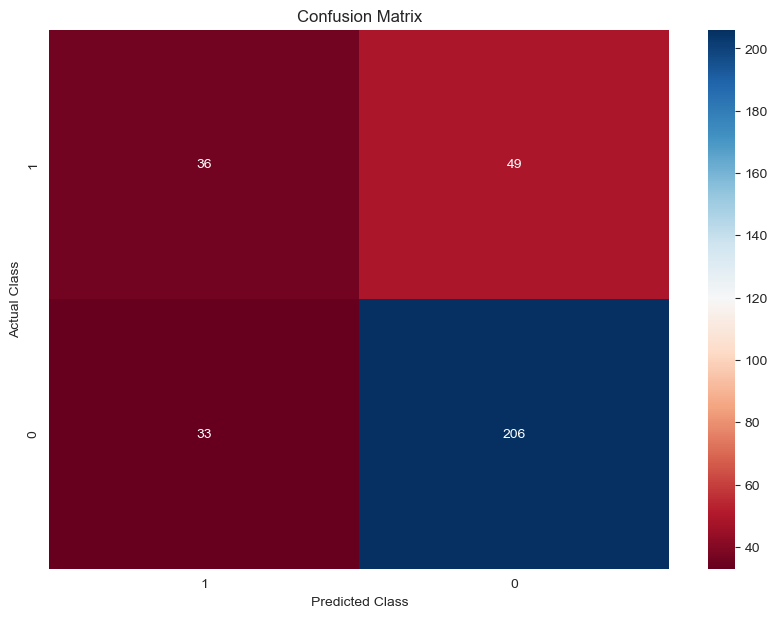

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       239
           1       0.52      0.42      0.47        85

    accuracy                           0.75       324
   macro avg       0.66      0.64      0.65       324
weighted avg       0.73      0.75      0.74       324



In [17]:
predictions = model.predict(x_test[feature_selection['BG']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['GradientBoostingClassifier']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### Kết luận:
- Nhìn vào đồ thị có thể thấy giá trị trung vị của mô hình Random Forest là cao nhất theo scoring="Accuracy"
- Mô hình LDA là mô hình ít bị biến động nhất và mô hình GD là một mô hình cân đối khi vừa có tỉ lệ ít biến động vừa có khoảng trung vị cao tương đối

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [18]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model=SVC(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

SVC(class_weight={0: 0.654690618762475, 1: 2.1161290322580646})

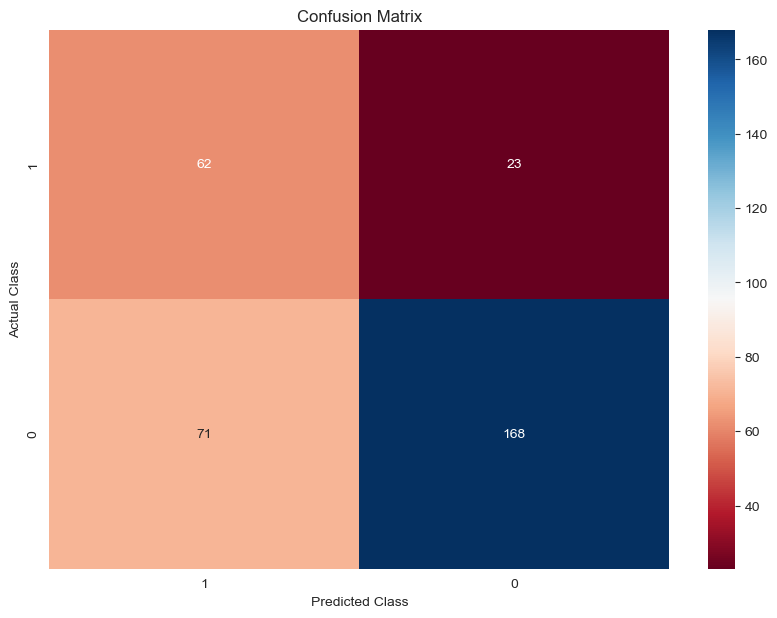

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       239
           1       0.47      0.73      0.57        85

    accuracy                           0.71       324
   macro avg       0.67      0.72      0.68       324
weighted avg       0.77      0.71      0.73       324



In [19]:
predictions = model.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [22]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model=DecisionTreeClassifier(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646})

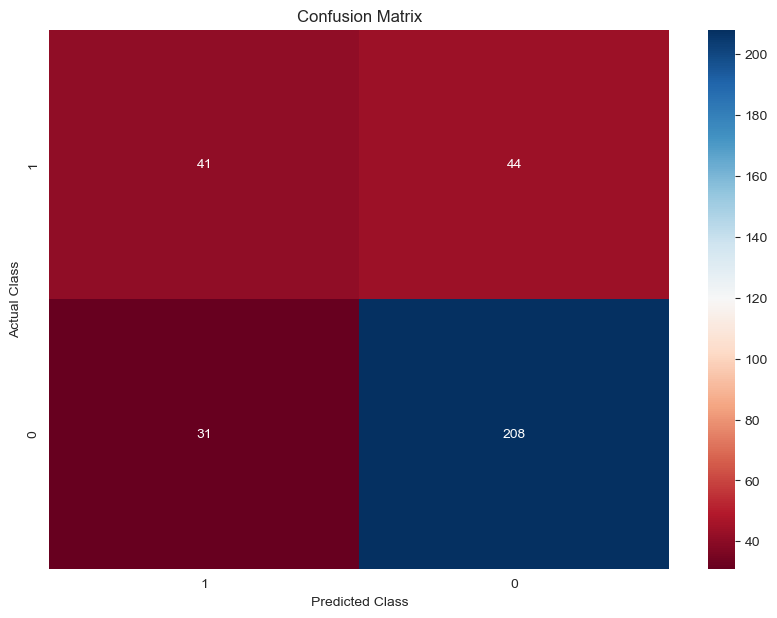

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       239
           1       0.57      0.48      0.52        85

    accuracy                           0.77       324
   macro avg       0.70      0.68      0.68       324
weighted avg       0.76      0.77      0.76       324



In [23]:
predictions = model.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Mô hình Random Forest
    - Có dấu hiệu tích cực hơn SVM

In [24]:
supervied_features=x_train[feature_selection['RD']]
supervied_target=y_train
model=RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

RandomForestClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646},
                       random_state=42)

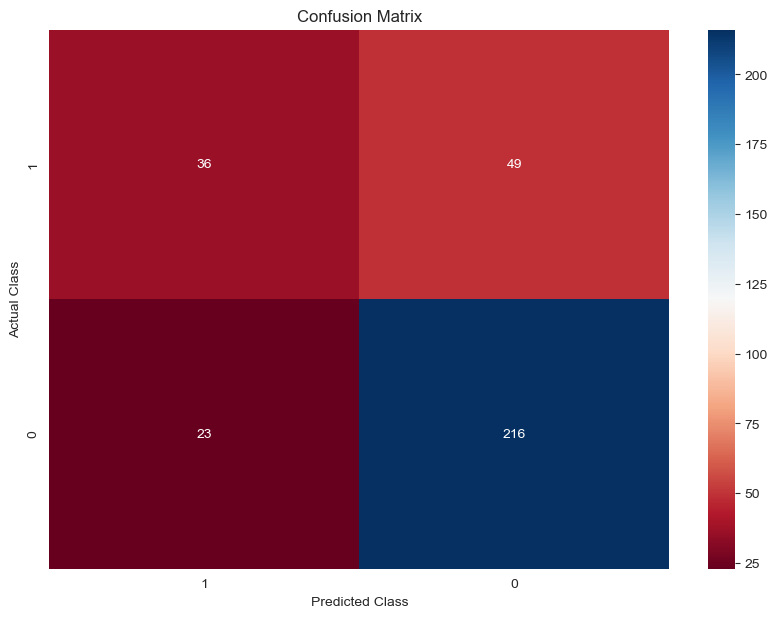

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       239
           1       0.61      0.42      0.50        85

    accuracy                           0.78       324
   macro avg       0.71      0.66      0.68       324
weighted avg       0.76      0.78      0.76       324



In [25]:
predictions = model.predict(x_test[feature_selection['RD']])

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)

# Hiển thị báo cáo phân loại để xem thêm thông tin chi tiết
print(classification_report(y_test, predictions))

In [26]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       239
           1       0.42      0.76      0.54        85

    accuracy                           0.66       324
   macro avg       0.65      0.69      0.64       324
weighted avg       0.76      0.66      0.68       324

GaussianNB
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       239
           1       0.37      0.44      0.40        85

    accuracy                           0.66       324
   macro avg       0.58      0.59      0.58       324
weighted avg       0.68      0.66      0.67       324

MultinomialNB
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       239
           1       0.27      0.24      0.25        85

    accuracy                           0.63       324
   macro avg       0.50      0.50      0.50       324
weighted avg       0.62      0

# Nhận xét dựa trên kết quả của tập test :

RD: Mô hình này có độ chính xác cao nhất (78%) so với các mô hình khác. Precision và Recall của nó cũng khá cân đối (0.82 và 0.90 cho lớp 0, 0.61 và 0.42 cho lớp 1), cho thấy mô hình này có hiệu suất tốt trong việc phân loại cả hai lớp.

DecisionTreeClassifier: Mô hình này có độ chính xác thứ hai cao nhất (77%) và Precision cao (0.83 cho lớp 0 và 0.57 cho lớp 1). Tuy nhiên, Recall của lớp 1 khá thấp (0.48), cho thấy mô hình này có thể bỏ sót một số trường hợp gian lận.

GradientBoostingClassifier: Mô hình này có độ chính xác thứ ba cao nhất (75%) và Precision tương đối (0.81 cho lớp 0 và 0.52 cho lớp 1). Tuy nhiên, Recall của lớp 1 cũng khá thấp (0.42).

Tổng kết lại ta có thể nhận thấy, mô hình RD có thể là lựa chọn tốt cho bài toán dự đoán hồ sơ gian lận, do có độ chính xác và Precision cao, cùng với Recall cân đối giữa hai lớp.

### So sánh kết quả giữ tập test và tập train :
Hiệu suất của các mô hình trên tập test nhìn chung thấp hơn so với tập train. Điều này cho thấy có thể có hiện tượng overfitting (quá khớp) trên tập train, hoặc sự khác biệt về phân phối dữ liệu giữa hai tập.
Tuy nhiên, hai mô hình DTC và RD hiển thị hiệu suất tương đối ổn định giữa tập train và tập test, với độ chính xác cao và F1-score tốt cho cả hai tập.

In [1]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [28]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [29]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: Y
Predicted: Y
----------------------------
Lần thứ 2: 
True: Y
Predicted: Y
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: N
Predicted: Y
----------------------------
Lần thứ 6: 
True: Y
Predicted: N
----------------------------
Lần thứ 7: 
True: Y
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: Y
----------------------------
Lần thứ 9: 
True: Y
Predicted: Y
----------------------------
Lần thứ 10: 
True: N
Predicted: N
----------------------------


In [30]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 6 chiếm khoảng 60.0% tổng lần dự đoán


In [31]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: N
----------------------------


True: Y
Predicted: Y
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


In [32]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 252 chiếm khoảng 77.77777777777779% tổng lần dự đoán
